In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((5,19),-np.inf,dtype=object)


1 spectrum  in use
 
Spectral Data File: 0886080701_PN53grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.805e-03 +/- 6.150e-04 (41.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-12
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.64e+04 sec
 Using fit statistic: chi
 Using Background File                0886080701_PN53spec_bkg.fits
  Background Exposure Time: 2.64e+04 sec
 Using Response (RMF) File            0886080701_PN53spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886080701_PN53spec.arf



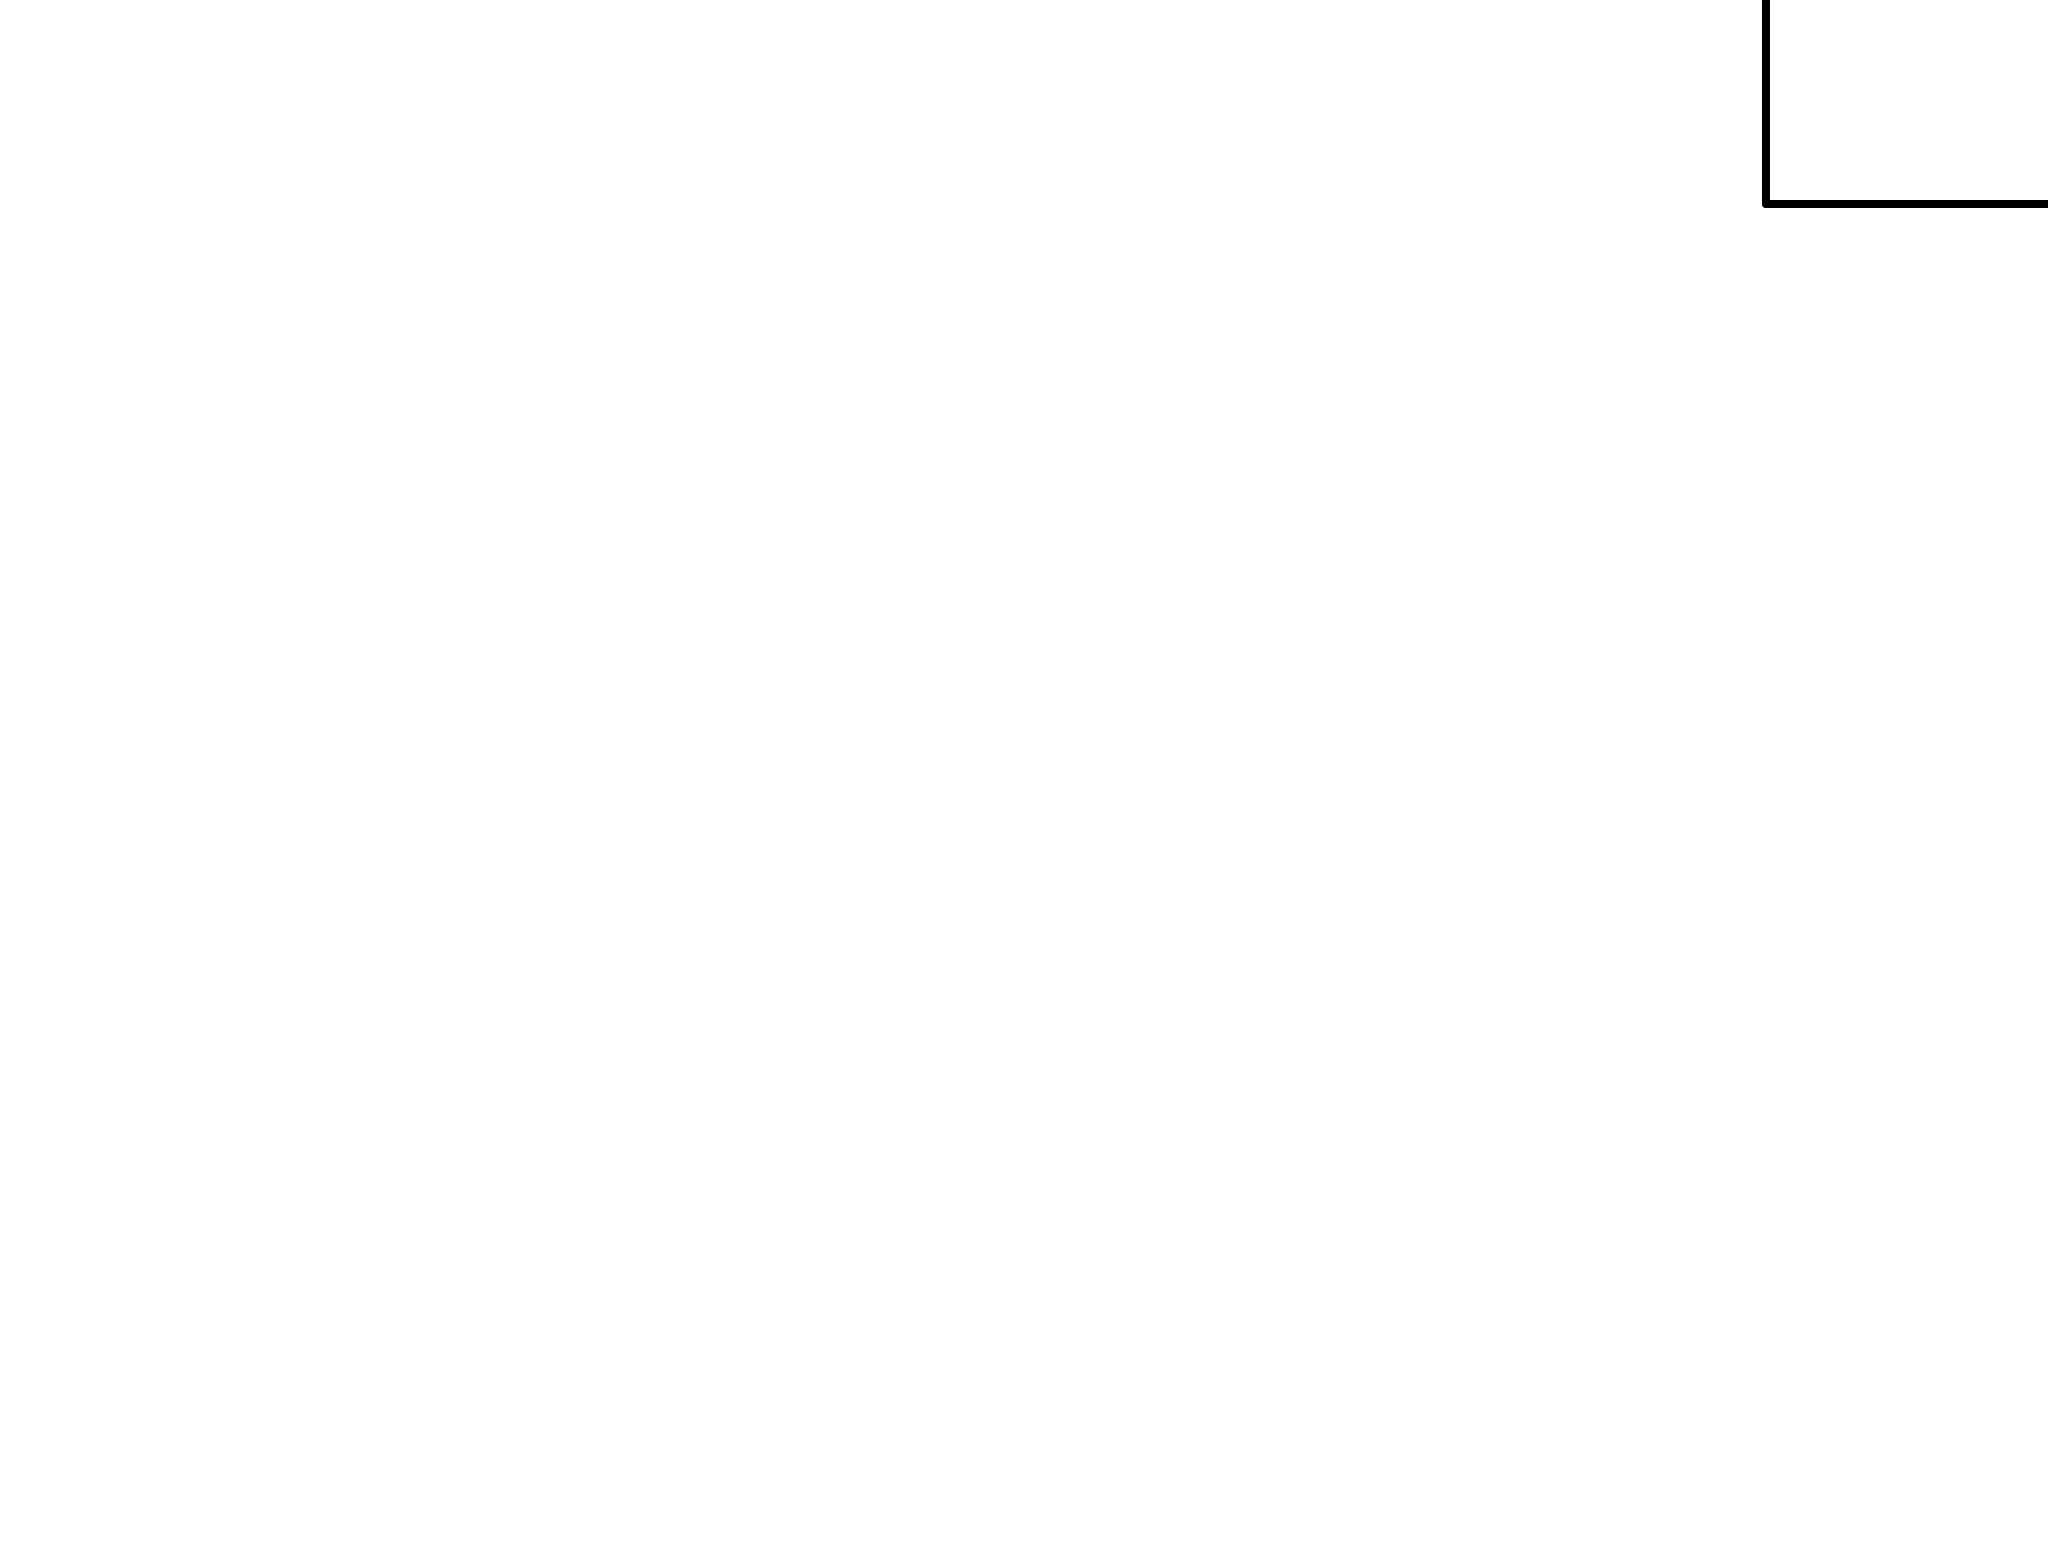

     3 channels (1-3) ignored in spectrum #     1
     1 channels (12) ignored in spectrum #     1



In [3]:
spec_fnames = glob.glob('*grpspec*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.000001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              9.775485e+10     using 8 bins.

Te

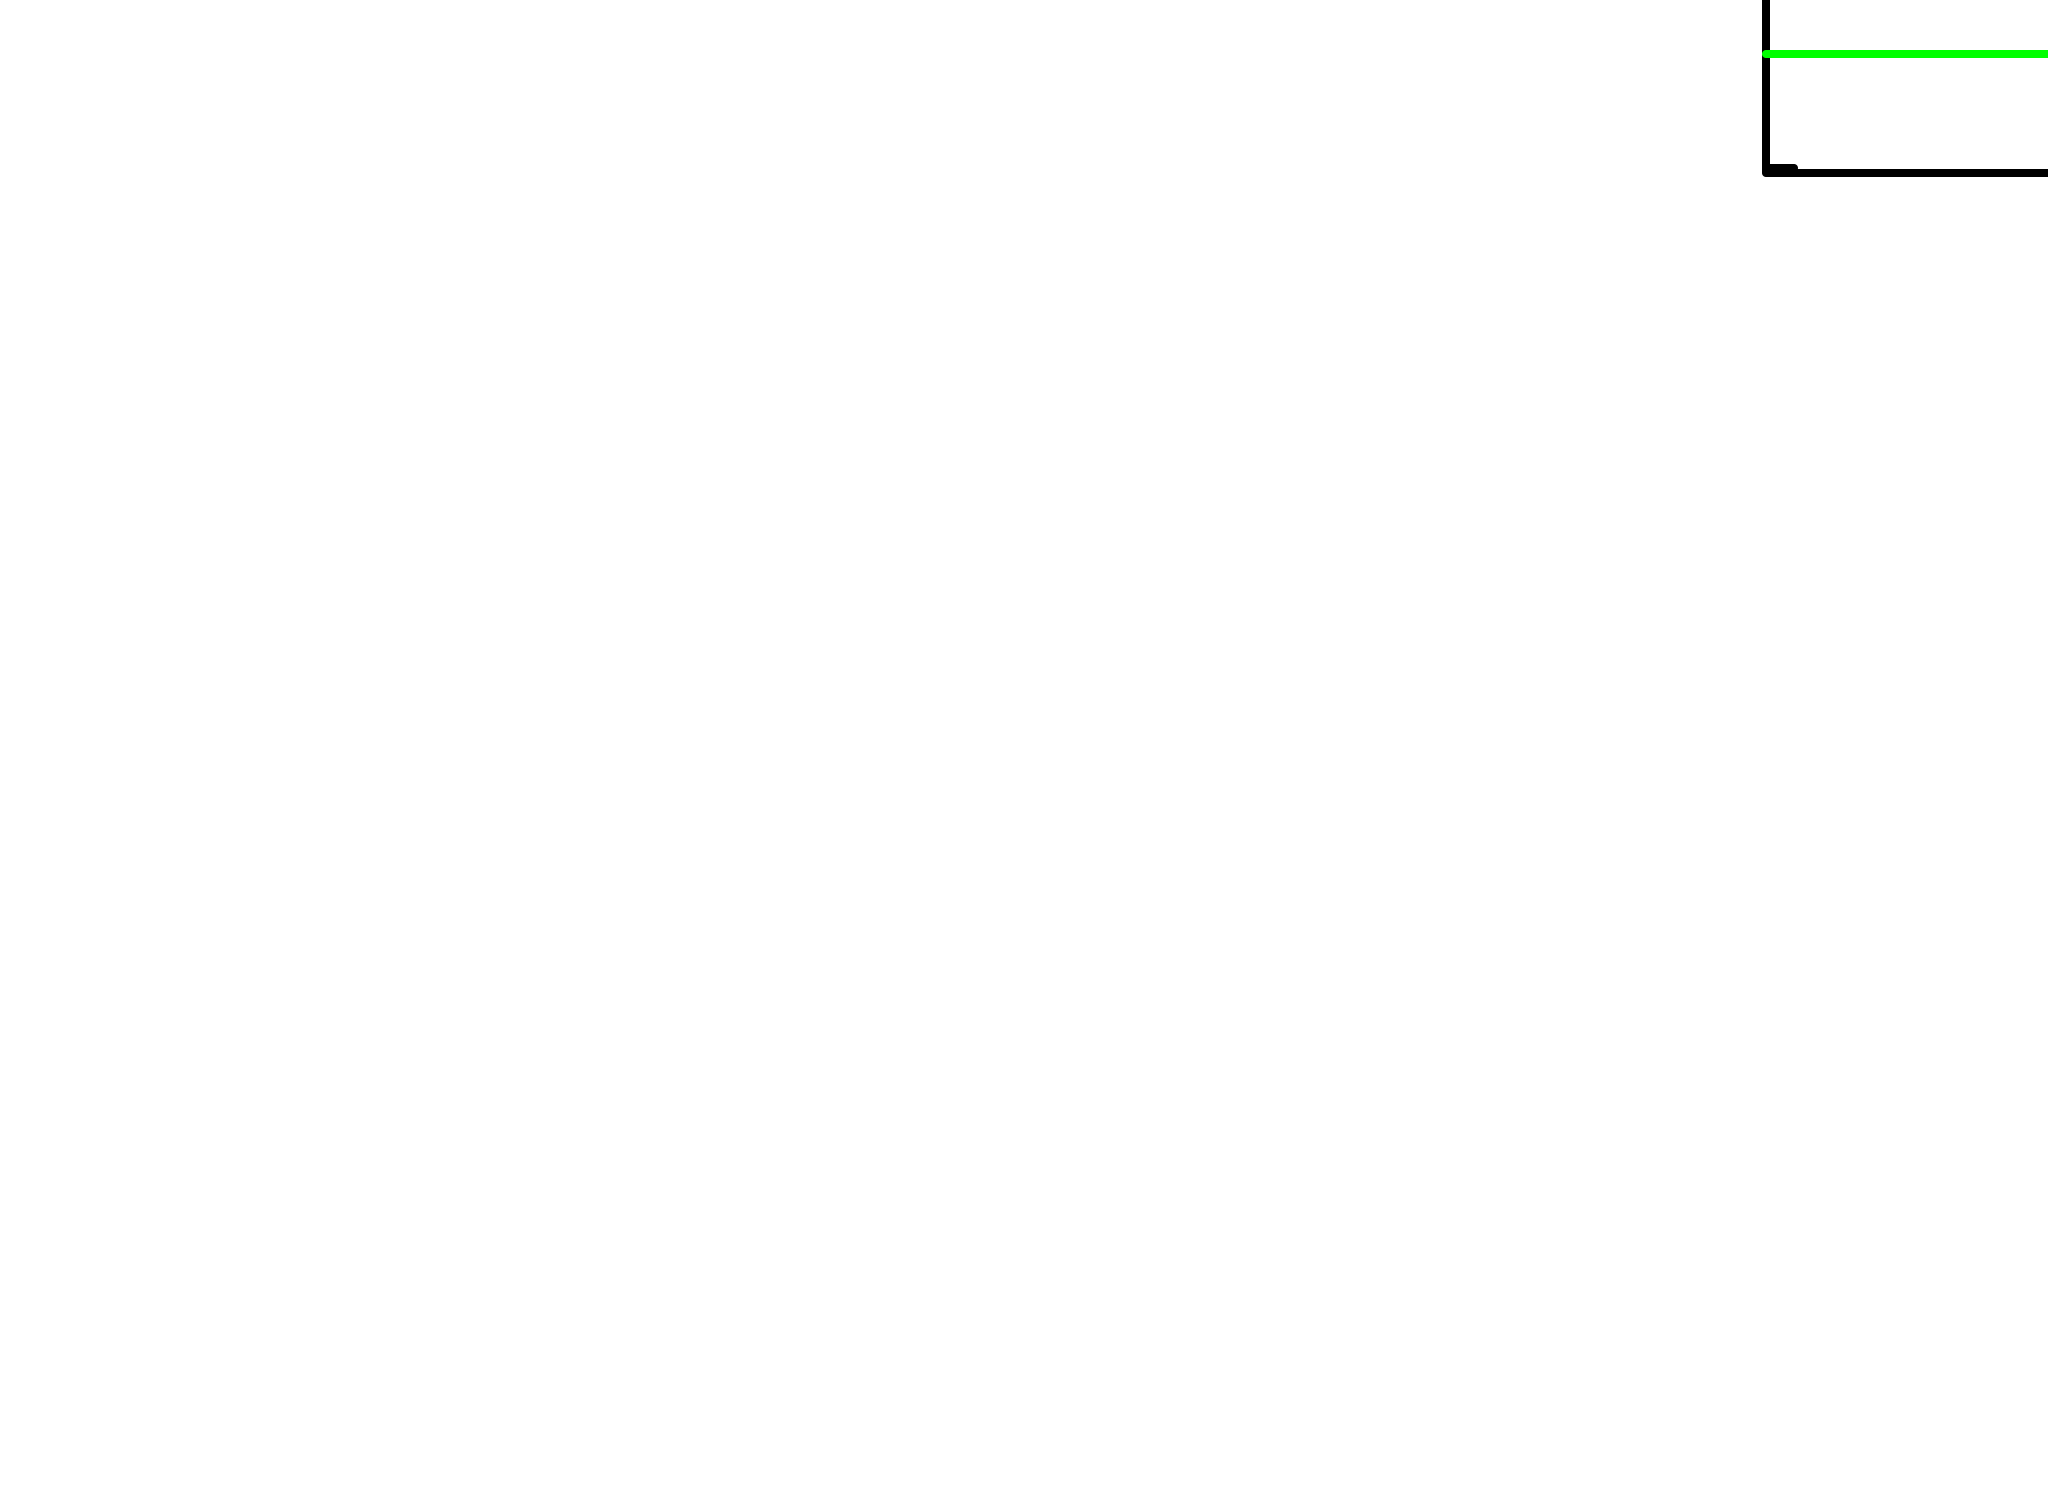

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [5]:
# Fit.error("1")
# Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[3,4:7] = mo.bremss.kT.values[0], np.inf, np.inf
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof



Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.257121e+11     using 8 bins.

Test statistic : Chi-Squared              4.257121e+11     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
17.9709      1.98323      -3       2.18328     -0.149020   2.44767e-06
16.8404      513141       -1       2.18962     0.0360211   2.74615e-06
16.5044      44242.7      -1       2.53784      0.172426   3.37674e-06
1

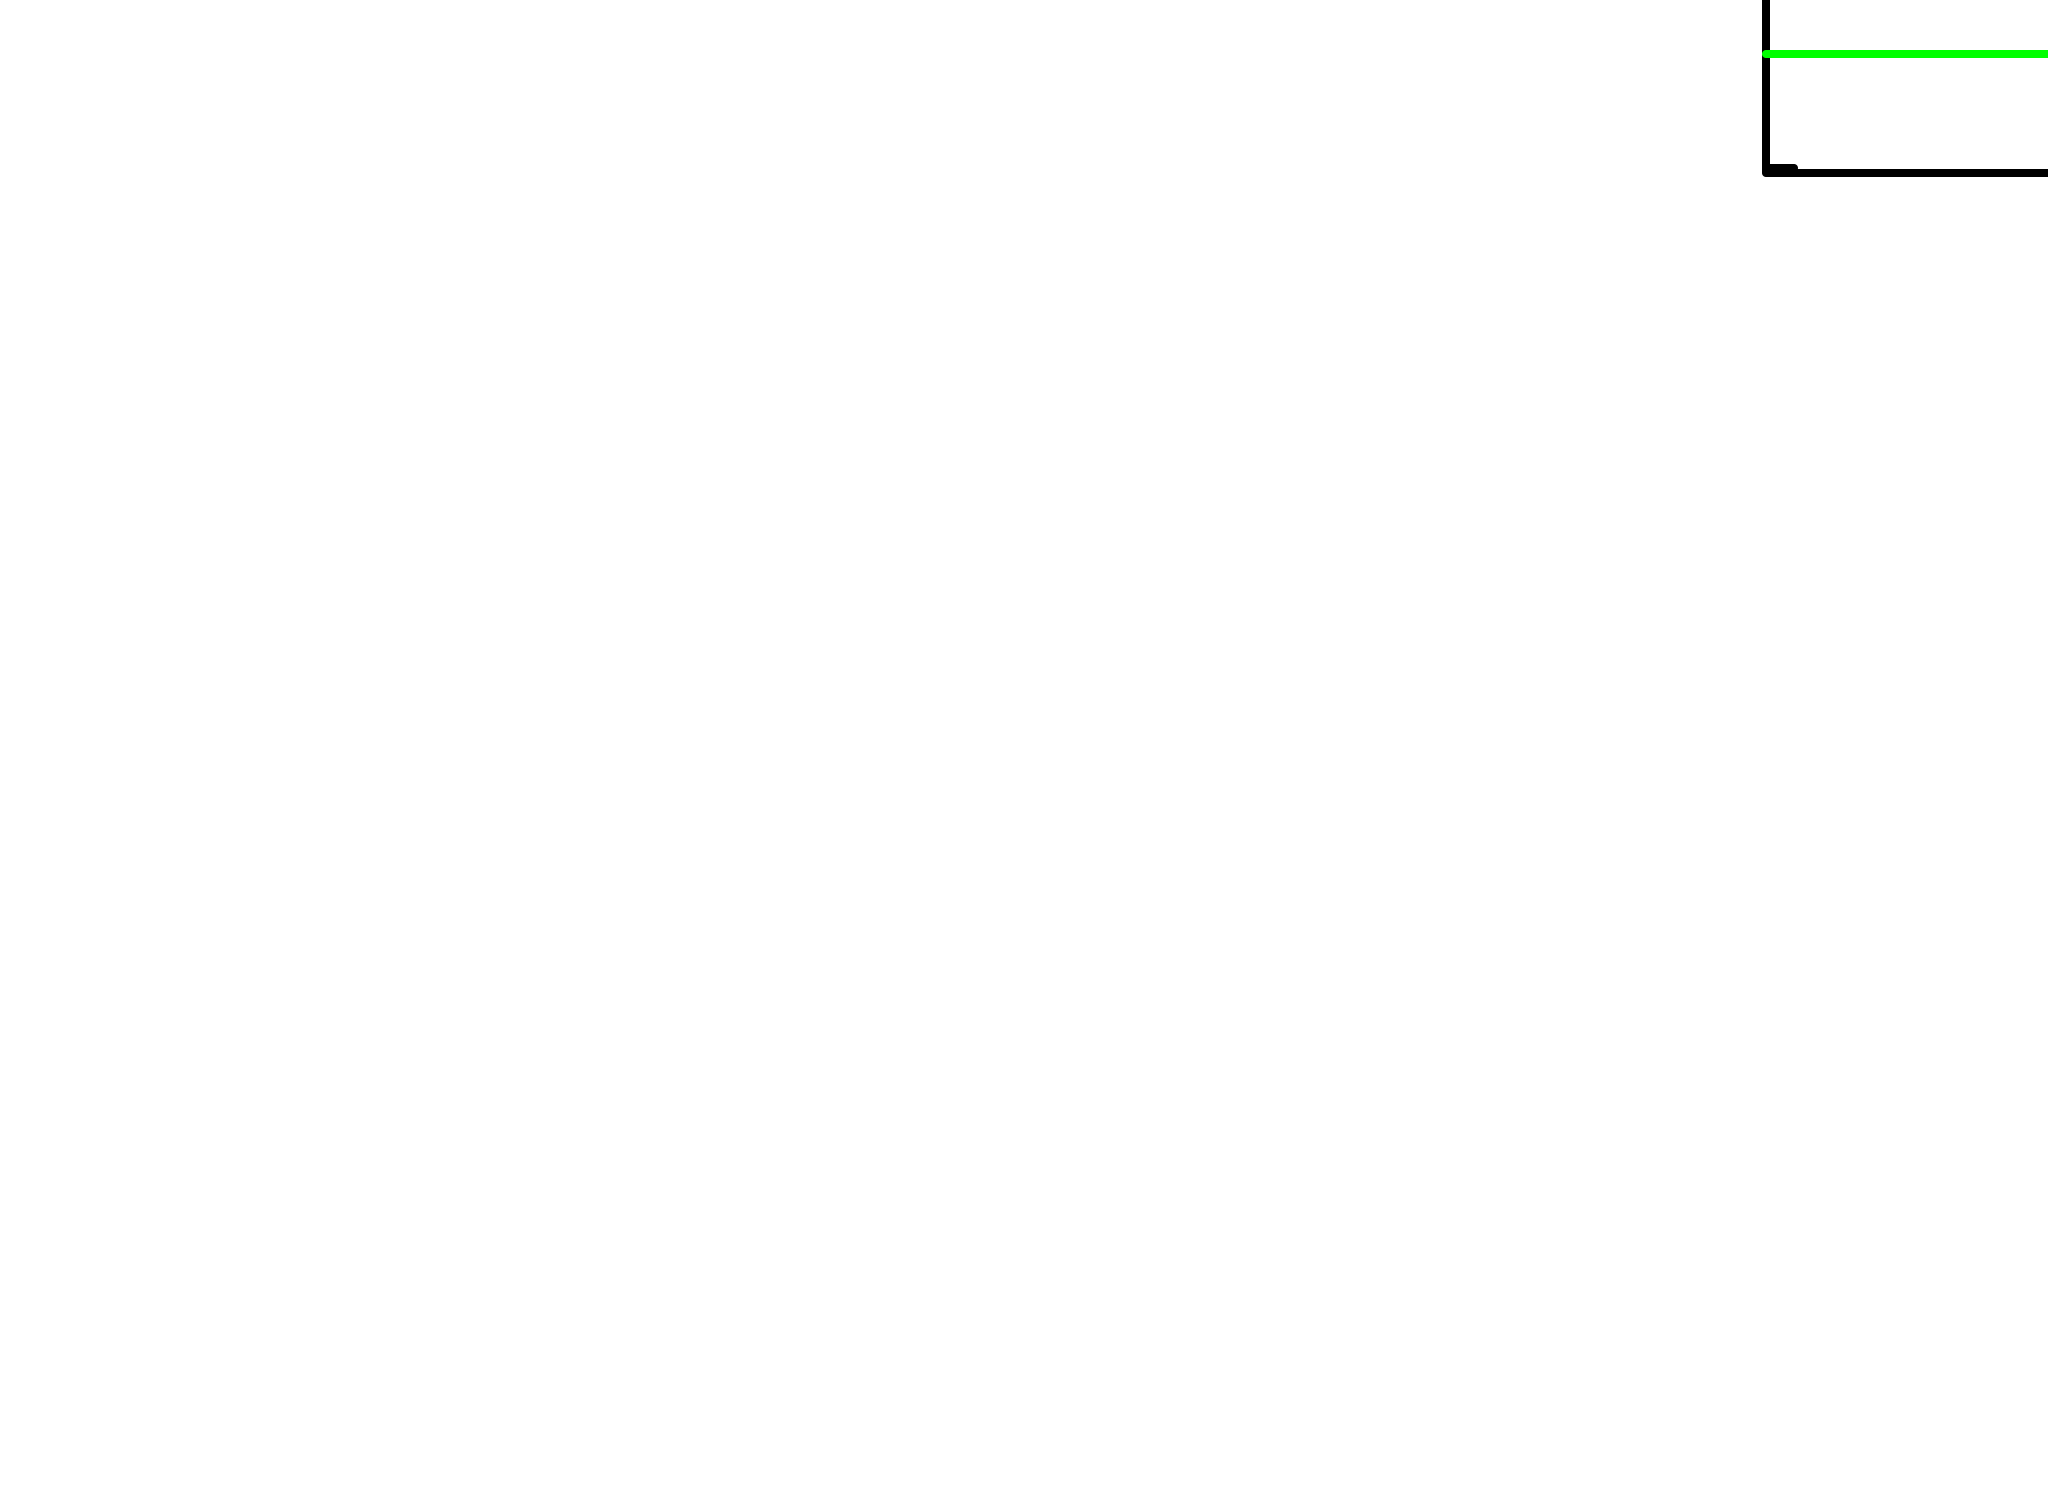

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
# Fit.error("1")
# Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], np.inf, np.inf
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              3.855263e+10     using 8 bins.

Test statistic : Chi-Squared              3.855263e+10     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
 Due to zero model norms, the following fit parameters are tem

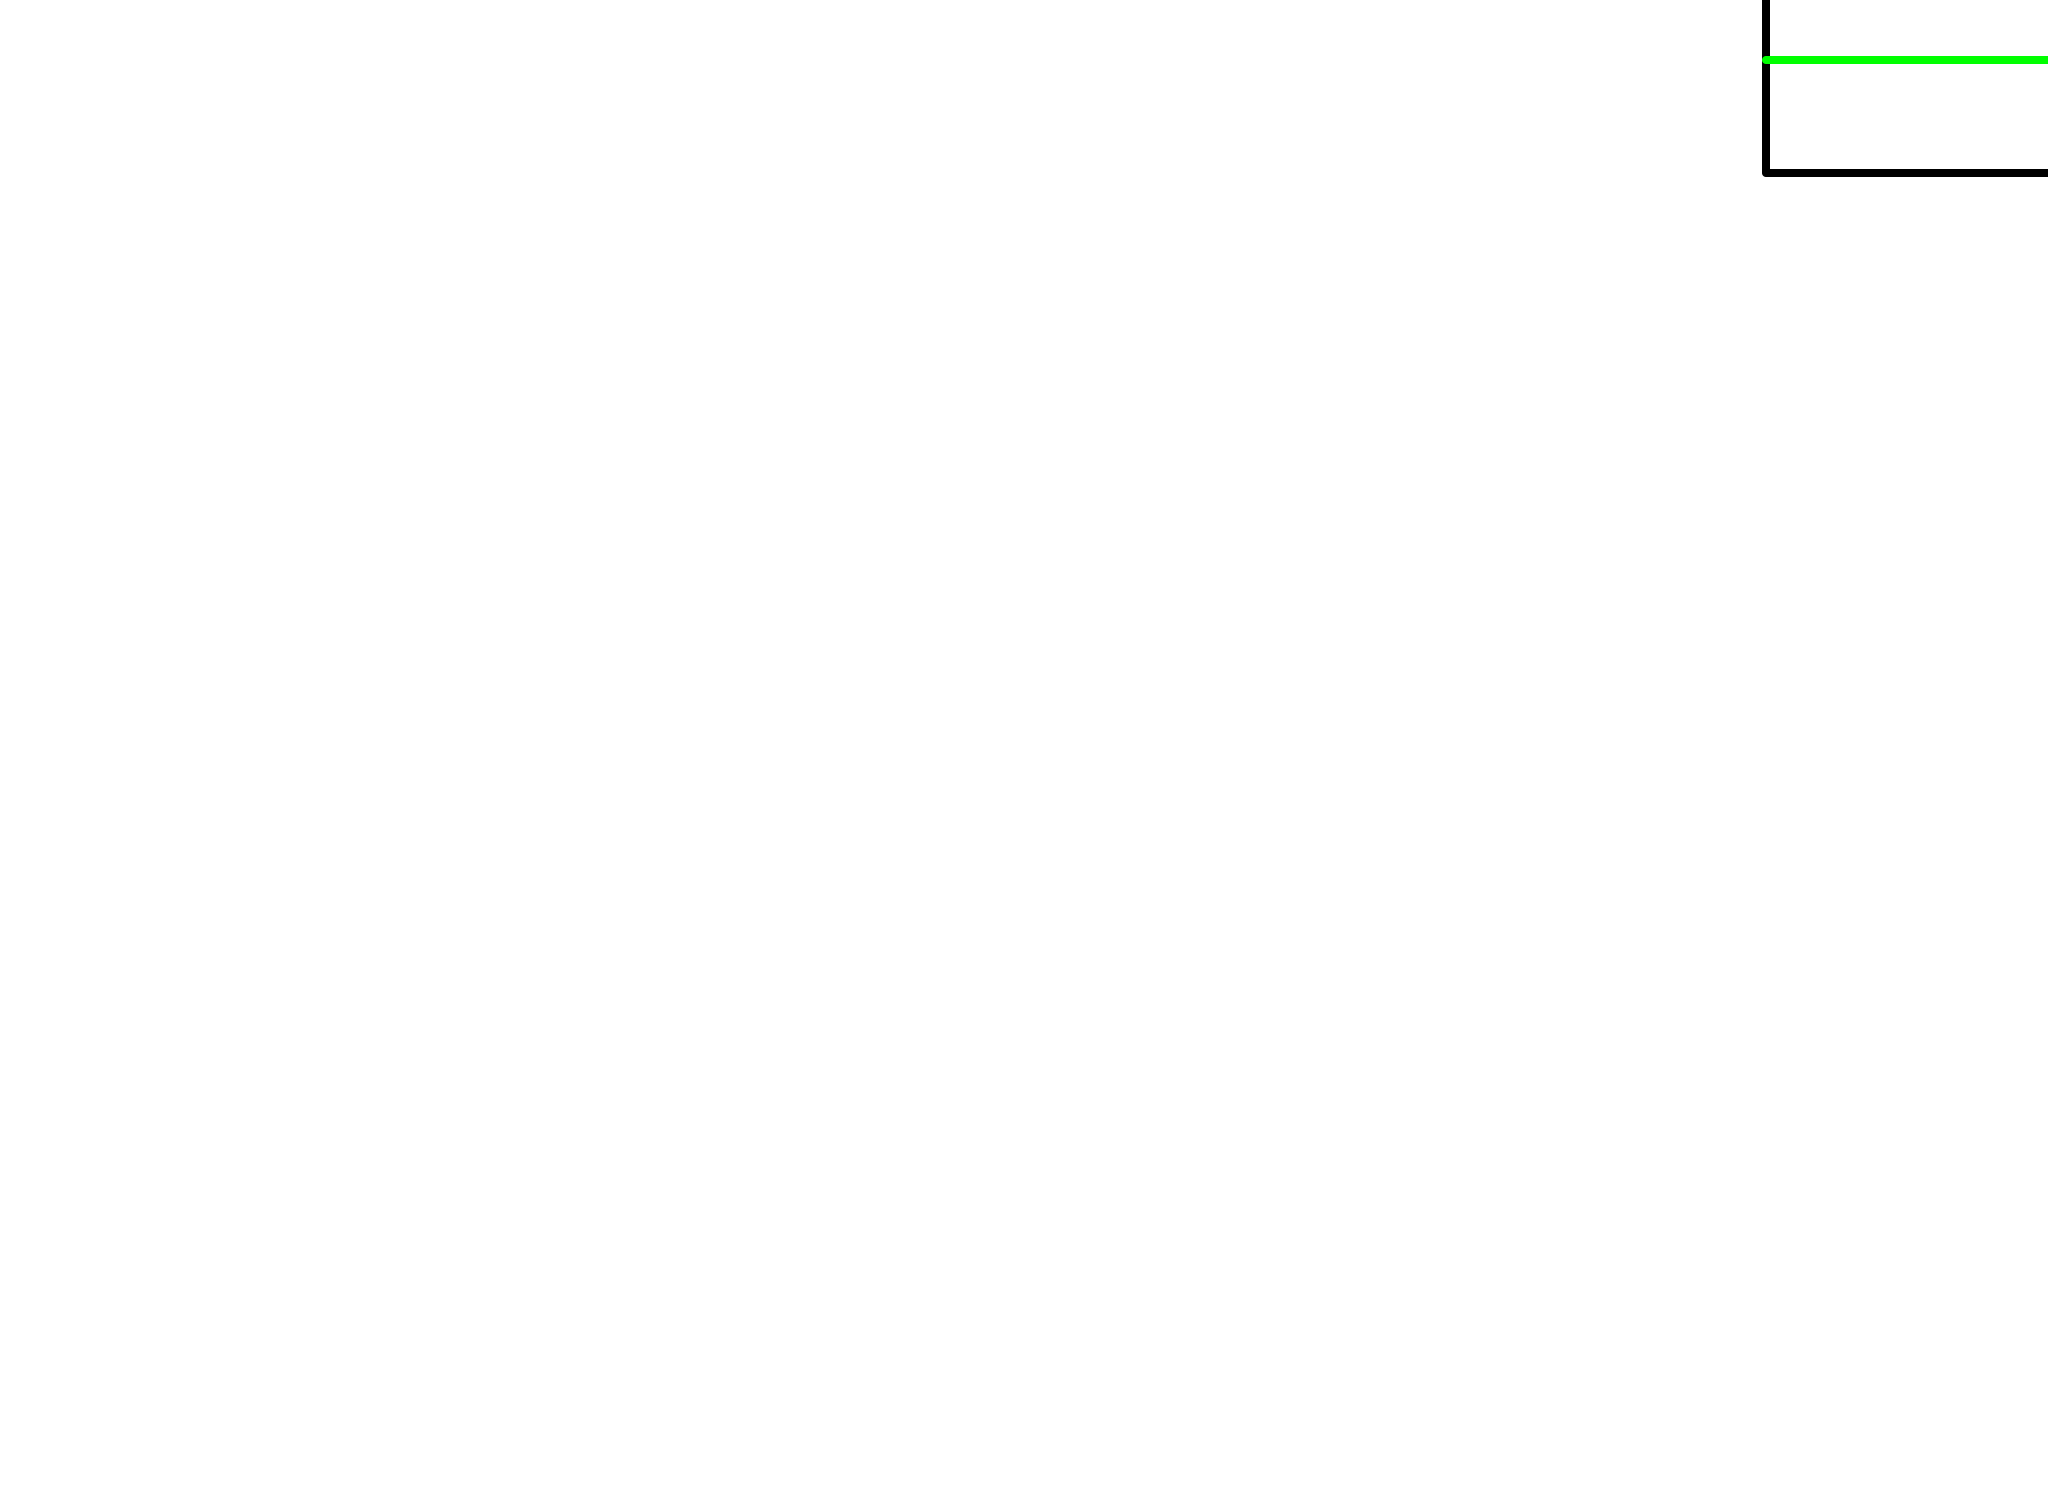

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [9]:
# Fit.error("1")
# Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], np.inf, np.inf
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof



Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.065345e+12     using 8 bins.

Test statistic : Chi-Squared              1.065345e+12     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
15.7114      0.23692      -1       2.17820       2.57778   3.78953e-06
15.1265      19589.5      -1       2.42510       2.23452   2.97768e-06
14.4983      31690.1      -1       2.93987       1.88572   2.43364e-06
14.0

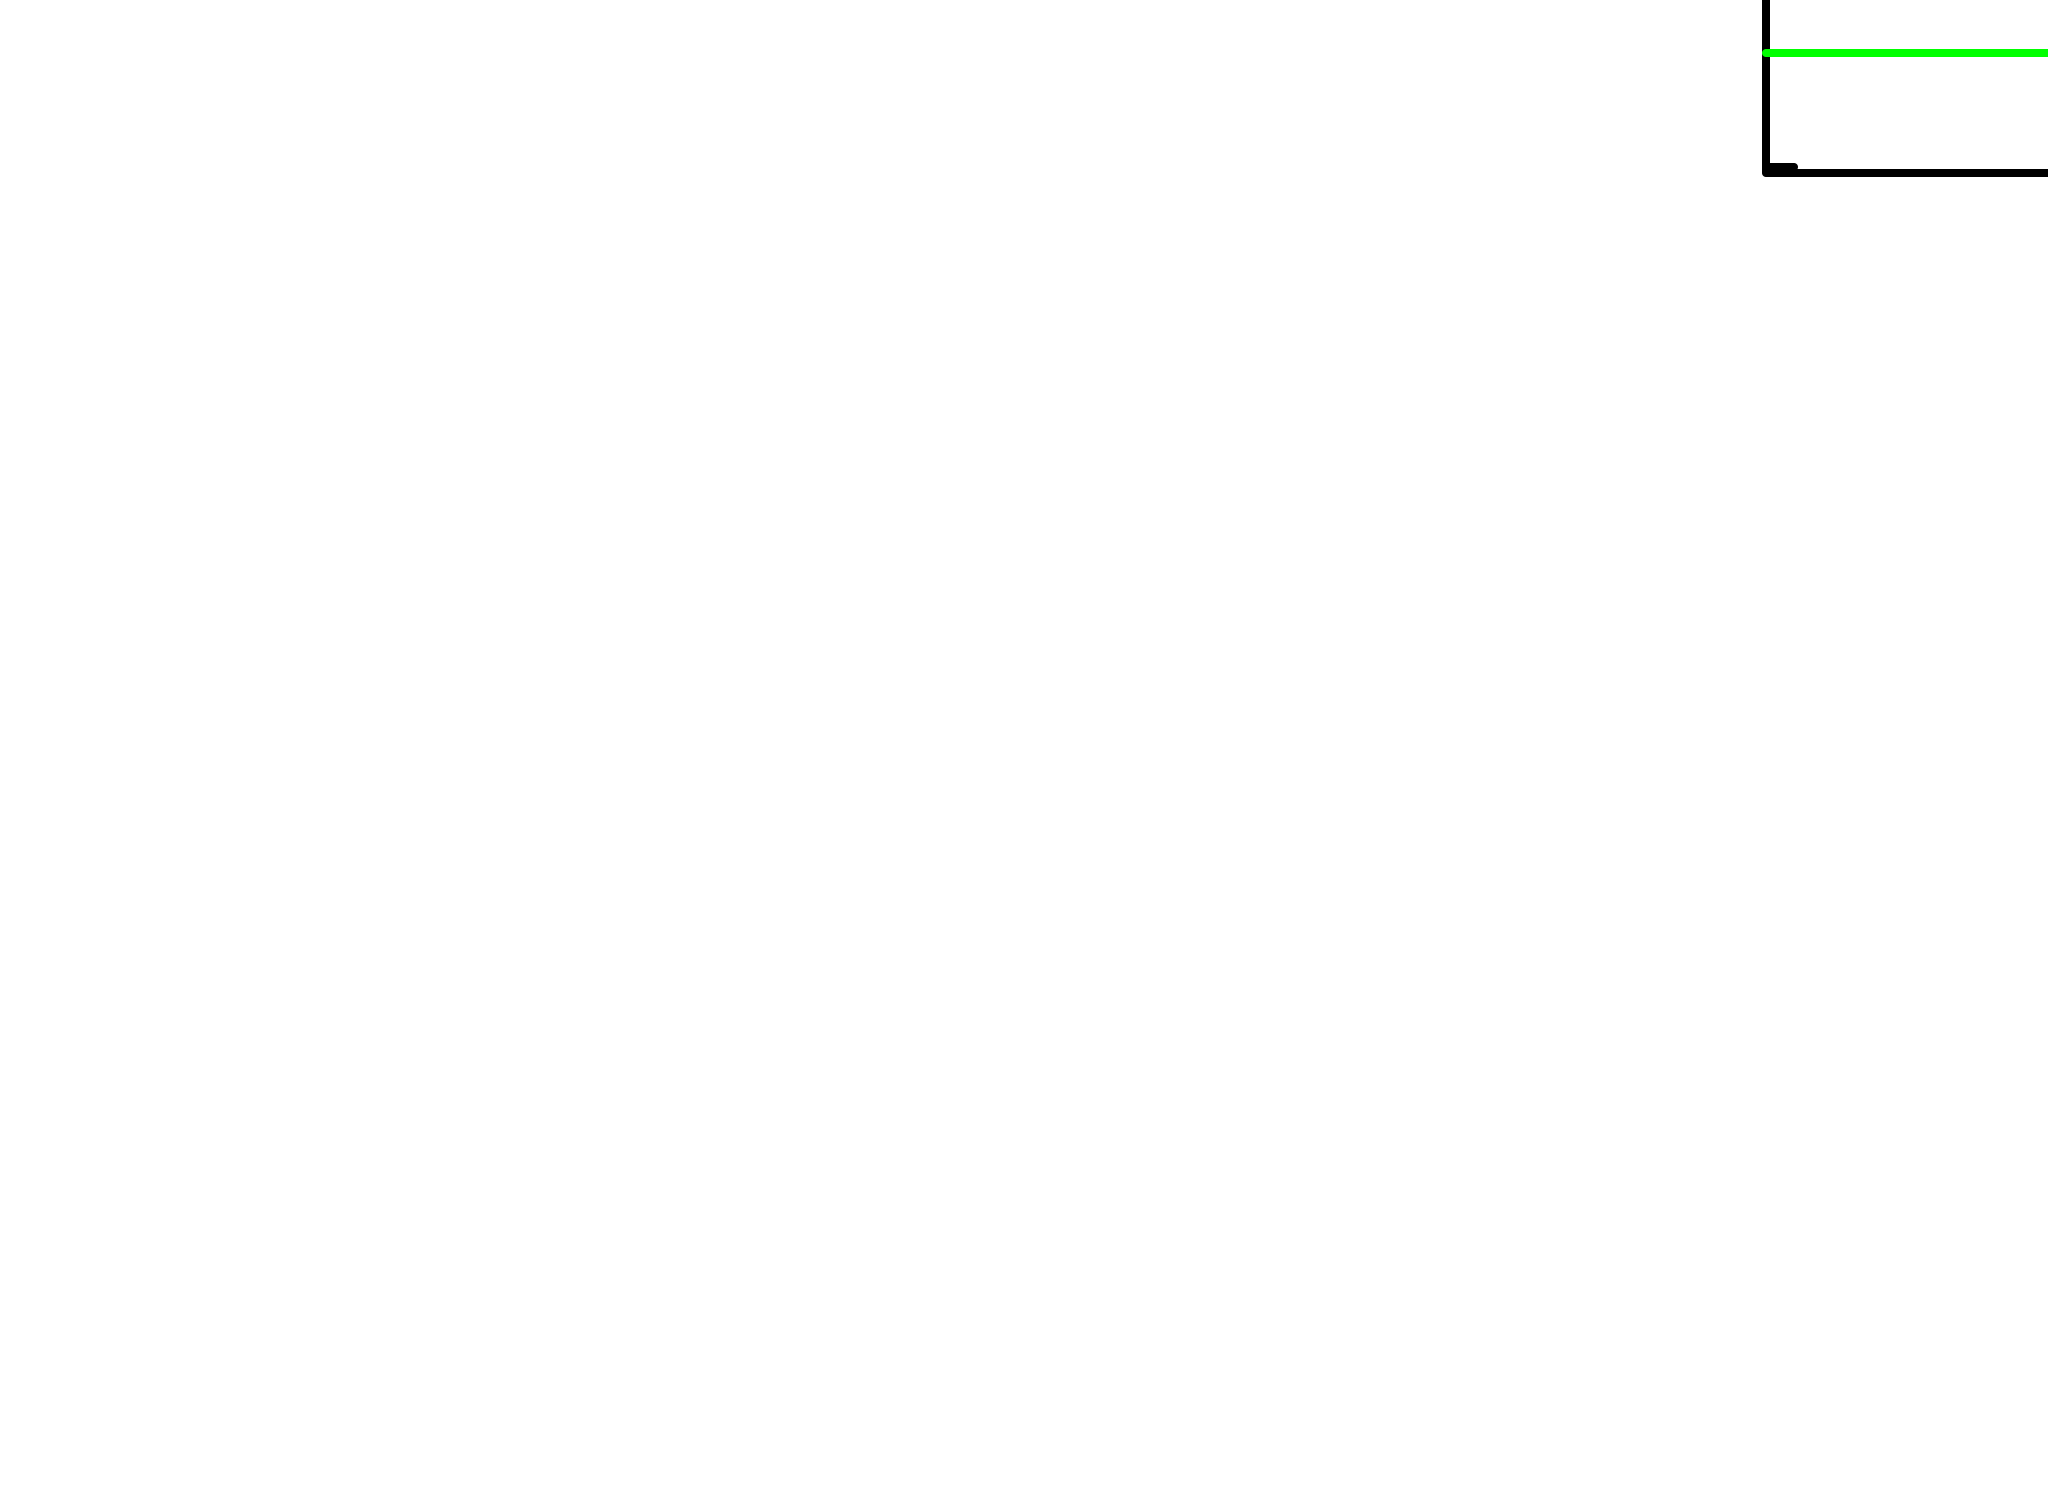

In [10]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [11]:
# Fit.error("1")
# Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[0,4:7] = mo.bbody.kT.values[0], np.inf, np.inf
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


In [12]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.342e-05 photons (1.0595e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [13]:
#plx = 2.3643
d_kpc = 8
F_x = 1.0595*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

8.110776195758081e+32


In [14]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
32.90906241788614


In [15]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.2839116619768747



Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.445542e+10     using 8 bins.

Test statistic : Chi-Squared              2.445542e+10     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.779386e+09     using 8 bins.

Test statistic : Chi-Squared              4.779386e+09     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degree

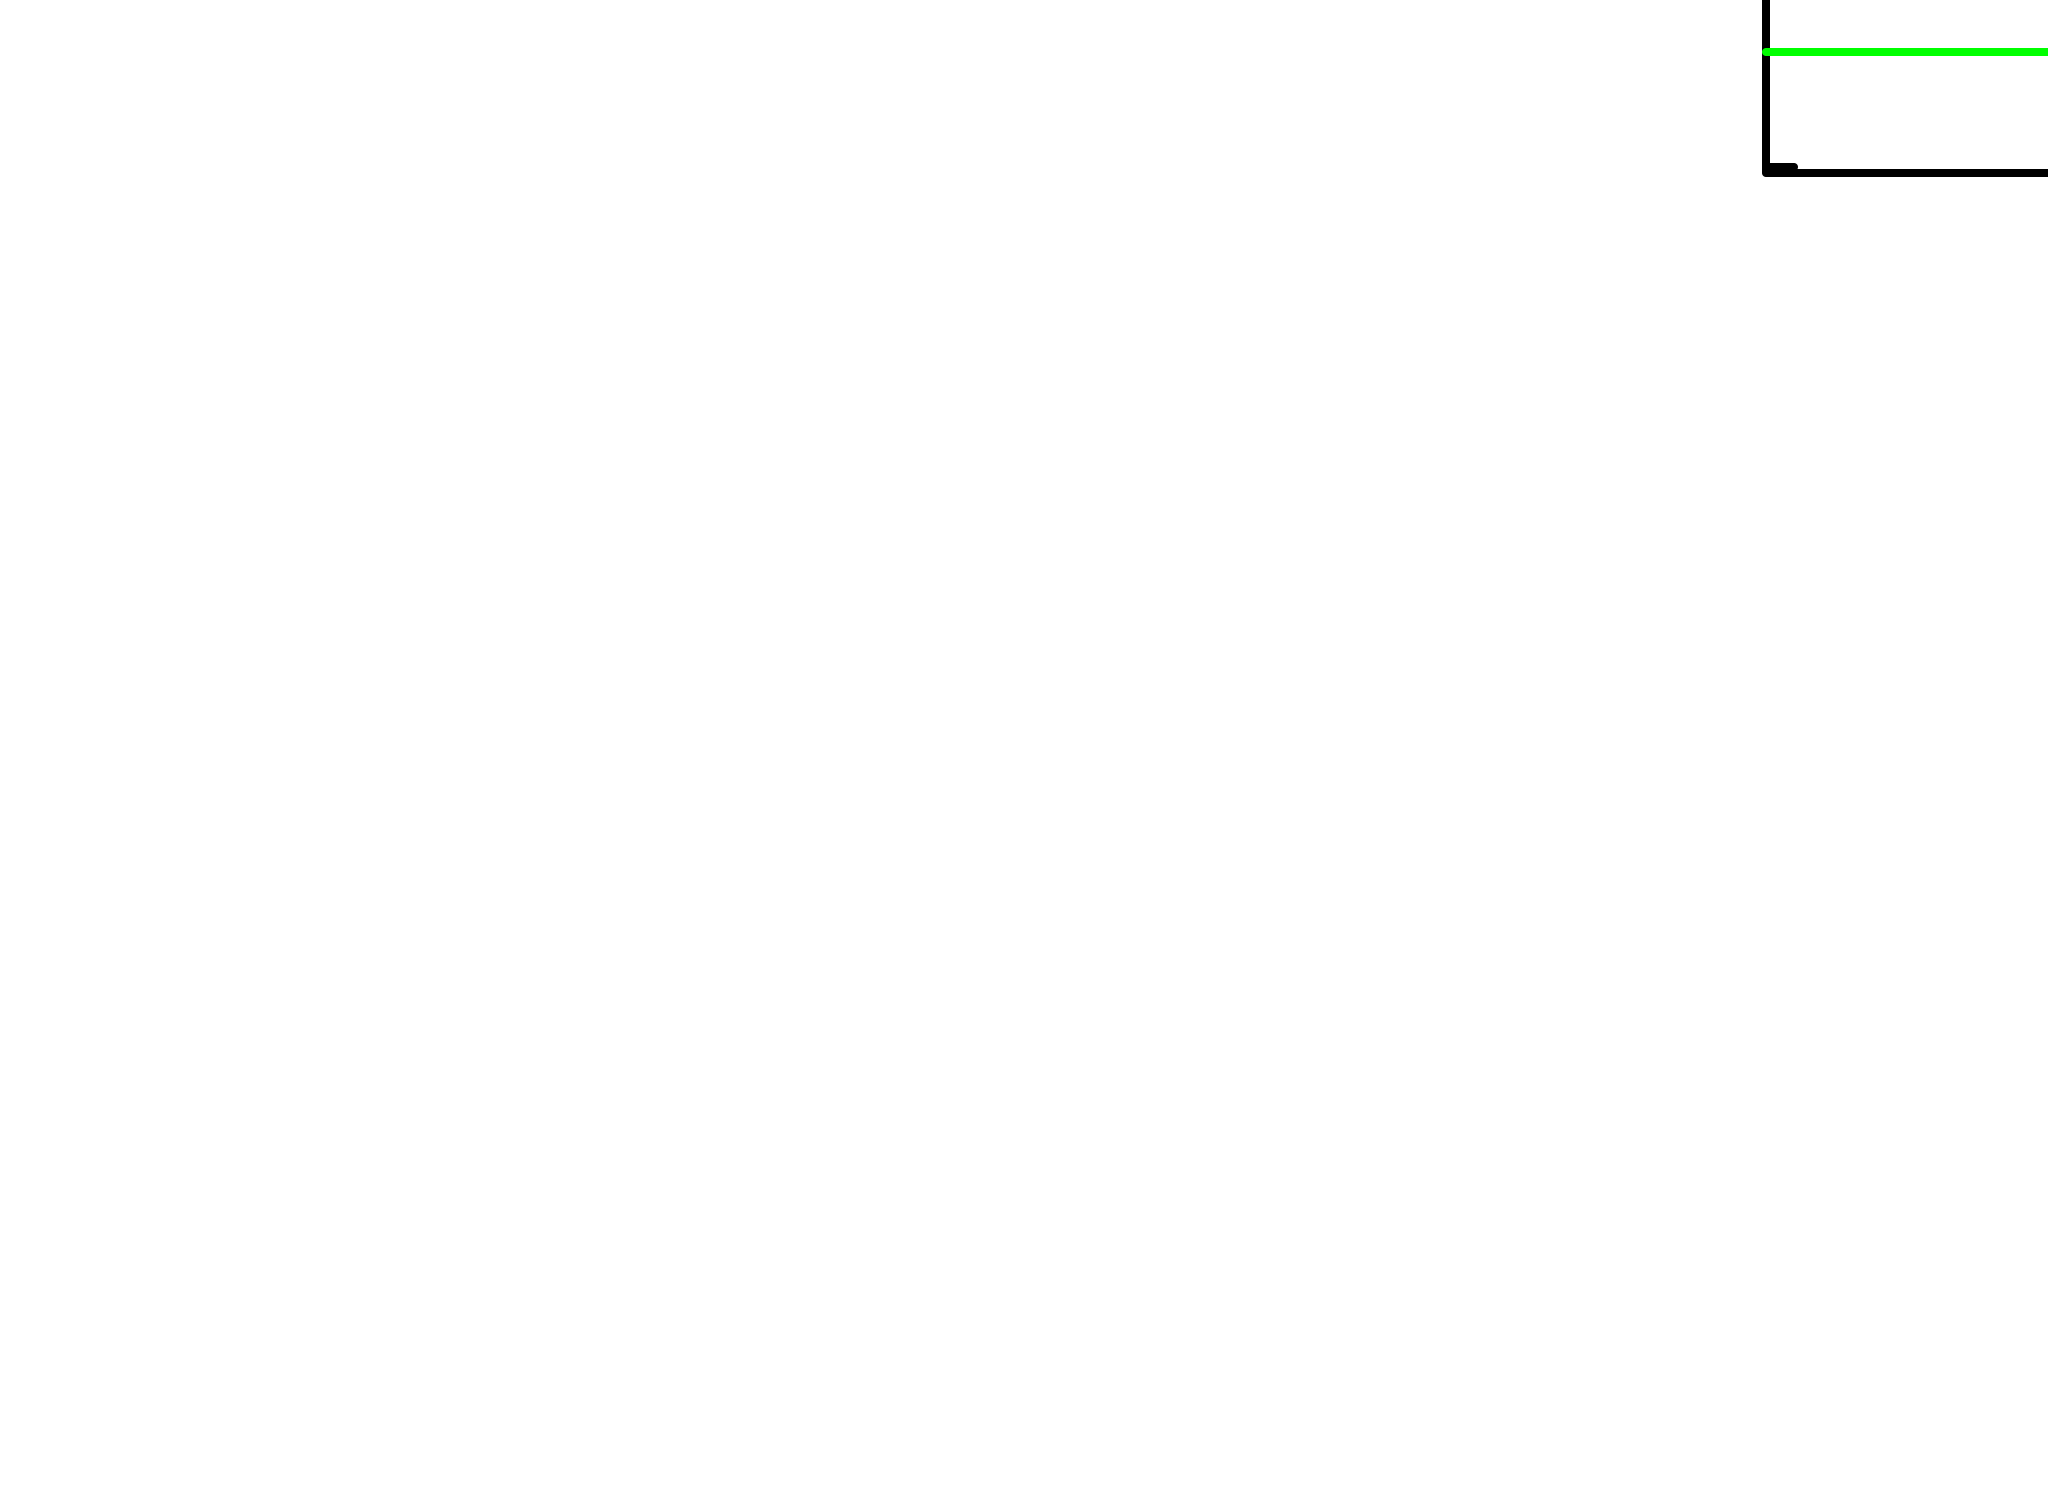

In [16]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc = 0.3
Fit.perform()
Plot("data resid")

In [17]:
# Fit.error("1")
# Fit.error("2")

out_arr[4,0] = 'raymond'
out_arr[4,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[4,13] = mo.raymond.Abundanc.values[0]
out_arr[4,4:7] = mo.raymond.kT.values[0], np.inf, np.inf
out_arr[4,-2:] = Fit.dof, Fit.statistic / Fit.dof


In [18]:
np.savetxt('spec11_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')
